# 6 アルゴリズムチェーンとパイプライン

In [1]:
# ライブラリインストール
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import mglearn
from IPython.display import display
import joblib
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter("ignore")

#　matplotlibでグラフ表示のマジックコマンド
%matplotlib inline

c:\users\nagar\.virtualenvs\introduction_to_ml_with_python-6nqet9co\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\nagar\.virtualenvs\introduction_to_ml_with_python-6nqet9co\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
# データをロードして分割
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = split(cancer.data, cancer.target, random_state=0)

# trainingデータの最小値と最大値を計算
scaler = MinMaxScaler().fit(X_train)

In [3]:
# trainingデータをスケール変換
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# SVMをスケール変換したデータで訓練
svm.fit(X_train_scaled, y_train)
# testデータをスケール変換して、それを用いて評価
X_test_scaled = scaler.transform(X_test)
print('Test set score: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

Test set score: 0.972


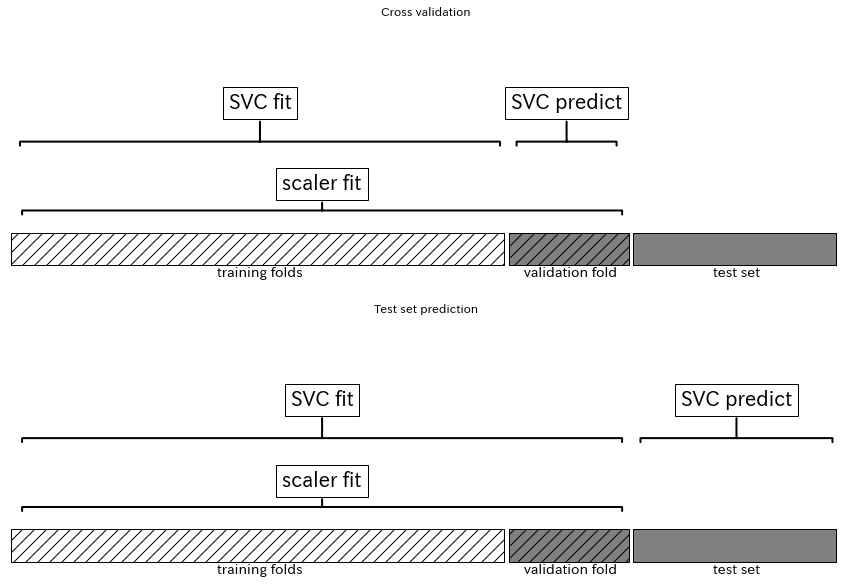

In [4]:
mglearn.plots.plot_improper_processing()

### 6.2 パイプラインの構築

In [5]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [7]:
print('Test score: {:.2f}'.format(pipe.score(X_test, y_test)))

Test score: 0.97


### 6.3 パイプラインを用いたグリッドサーチ

In [12]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print('Best cross-validation accuracy: {:.2f}'.format(grid.best_score_))
print('Test set score: {:.2f}'.format(grid.score(X_test, y_test)))
print(f'Best parameters: {grid.best_params_}')

Best cross-validation accuracy: 0.98
Test set score: 0.37
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


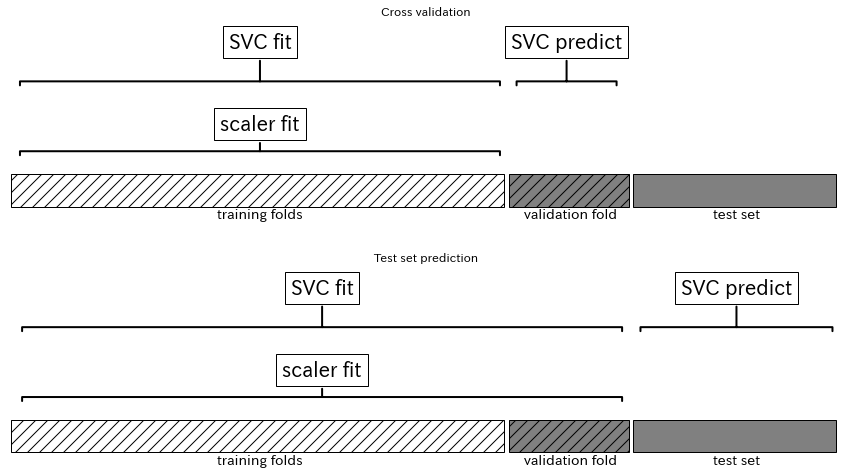

In [14]:
mglearn.plots.plot_proper_processing()

In [15]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        # 最後のステップ以外で、fitとtransformを順に実行
        X_transformed = estimator.fit_transform(X_transformed, y)
    # 最後のステップでfit
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [16]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        # 最後のステップ以外で、transformを順に実行
        X_transformed = step[1].transform(X_transformed)
    # 最後のステップではpredict
    return self.steps[-1][1].predict(X_transformed)